Здравствуйте, это работа Голубева Романа по векторизации. Здесь будут представлены 3 способа решения задачи о кодировании длин серий, а также сравнение их эффективности.


Импортируем нужные библиотеки и устанавливаем режимы для графиков:

In [ ]:
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg'

Итак, первая функция - наивное решение циклом. В нём массив проходится последовательно и каждое новое значение записывается в массив значений (a). Кроме того, для каждого значения считается количество его повторений и записывается во второй массив (b)

In [ ]:
def encode_rle1(x):
    a=[]
    b=[]
    a.append(x[0])
    k=1
    for i in range(len(x)-1):
        if x[i+1]!=x[i]:
            a.append(x[i+1])
            b.append(k)
            k=0
        k+=1
    b.append(k)
    return a,b

Вторая функция - частично векторизованное решение. Массив количества повторений получается таким же способом: последовательным проссмотром массива. А массив значений получается с помощью функций numpy: находятся индексы, в которых появляются новые значения, и по ним берутся сами значения

In [ ]:
def encode_rle2(x):
    index = np.where(np.diff(x) != 0)[0] + 1
    indexs = np.concatenate(([0], index, [len(x)]))
    values = x[indexs[:-1]]
    b = []
    k = 1
    for i in range(len(x) - 1):
        if x[i + 1] != x[i]:
            b.append(k)
            k = 0
        k += 1
    b.append(k)
    return values, b

Третья функция представляет собой полностью векторизованную задачу. Массив значений получается таким же образом, как в предыдущей реализации, а массив количества повторений находится как разность индексов с новыми значениями

In [ ]:
def encode_rle3(x):
    index = np.where(np.diff(x) != 0)[0] + 1
    indexs = np.concatenate(([0], index, [len(x)]))
    values = x[indexs[:-1]]
    counts = np.diff(indexs)
    return values, counts

###Далее генерируются с возрастающей длиной генерируются случайные векторы, и подсчитывается время работы функции для каждого из векторов для всех функций

In [ ]:
x=[]
y=[]
z=[]
for i in range(1,10000,2):
  vector=np.random.randint(-10,10,i)
  start = datetime.datetime.now()
  encode_rle1(vector)
  finish = datetime.datetime.now()
  x.append(float(str(finish - start)[-6:])/1000000)
  start = datetime.datetime.now()
  encode_rle2(vector)
  finish = datetime.datetime.now()
  y.append(float(str(finish - start)[-6:])/1000000)
  start = datetime.datetime.now()
  encode_rle3(vector)
  finish = datetime.datetime.now()
  z.append(float(str(finish - start)[-6:])/1000000)

print(x)
print(y)
print(z)

[1.2e-05, 9e-06, 8e-06, 9e-06, 1.1e-05, 1.2e-05, 1.4e-05, 2.3e-05, 1.6e-05, 1.8e-05, 2.4e-05, 2.5e-05, 2.8e-05, 3e-05, 3.1e-05, 3e-05, 3.3e-05, 4.2e-05, 3.6e-05, 3.8e-05, 4e-05, 4.1e-05, 5.2e-05, 4.7e-05, 4.6e-05, 5.2e-05, 6.4e-05, 5.2e-05, 6.4e-05, 5.8e-05, 5.9e-05, 6.1e-05, 5.6e-05, 6.8e-05, 6.6e-05, 6.3e-05, 6.5e-05, 6.8e-05, 8e-05, 6.3e-05, 0.000115, 0.000104, 0.000132, 7.7e-05, 7.7e-05, 7.9e-05, 7.9e-05, 7.9e-05, 0.000946, 8.9e-05, 7.7e-05, 7.6e-05, 0.000467, 7.7e-05, 0.000114, 9.1e-05, 8.6e-05, 8.8e-05, 9.5e-05, 9.2e-05, 9e-05, 9.9e-05, 9.5e-05, 9.4e-05, 0.000138, 0.000108, 0.000108, 0.000106, 0.000106, 0.000111, 0.000106, 0.000131, 0.000114, 0.000107, 0.000107, 0.000102, 7.6e-05, 7.6e-05, 8e-05, 8.3e-05, 8e-05, 9.9e-05, 8.1e-05, 8.1e-05, 8.3e-05, 8.3e-05, 0.000125, 8.1e-05, 8.2e-05, 8.7e-05, 8.7e-05, 9.1e-05, 9.1e-05, 9.6e-05, 9.3e-05, 9.5e-05, 8.8e-05, 8.8e-05, 9e-05, 0.000109, 0.000102, 9.7e-05, 9.8e-05, 0.0001, 0.00011, 0.000104, 0.000103, 0.000102, 0.000114, 0.000108, 0.0001

###Построим график зависимости времени решения задачи на случайном векторе от его длины и увидим линейный рост времени решения:

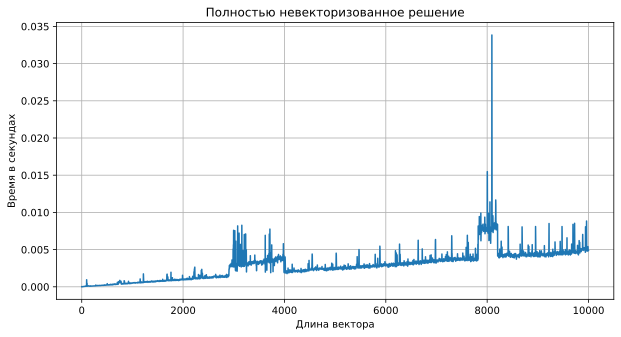

In [ ]:
t1=[]
for i in range(1,10000,2):
  t1.append(i)
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(t1,x)
plt.xlabel('Длина вектора')
plt.ylabel('Время в секундах')
plt.title('Полностью невекторизованное решение')
plt.show()

###Для частично векторизованной функции делаем то же самое, рост также линейный, значения времени похожи, сравнение эффективности этих двух функций сделаем далее

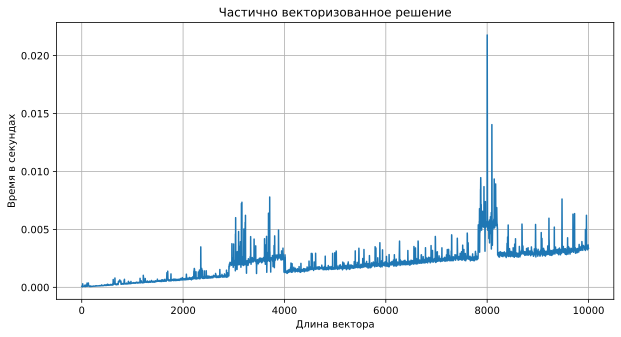

In [ ]:
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(t1,y)
plt.xlabel('Длина вектора')
plt.ylabel('Время в секундах')
plt.title('Частично векторизованное решение')
plt.show()

###Полностью векторизованное решение имеет заметное преимущество по абсолютным значениям времени решения, кроме того, с увеличением длины вектора время решения практически не растет

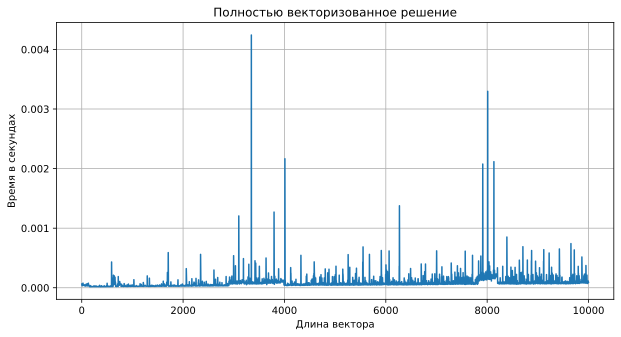

In [ ]:
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(t1,z)
plt.xlabel('Длина вектора')
plt.ylabel('Время в секундах')
plt.title('Полностью векторизованное решение')
plt.show()

###Сравним эффективность решений:

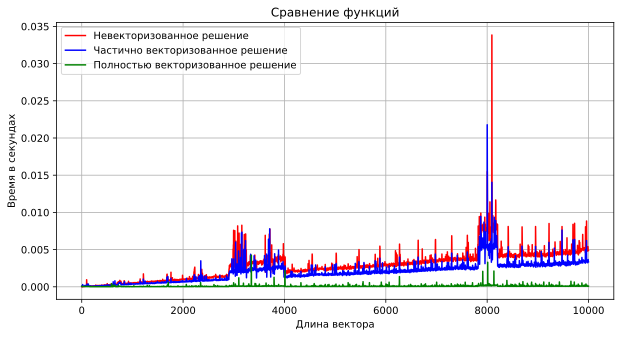

In [ ]:
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(t1,x,color='red')
plt.plot(t1,y,color='blue')
plt.plot(t1,z,color='green')
plt.xlabel('Длина вектора')
plt.ylabel('Время в секундах')
plt.title('Сравнение функций')
plt.legend (('Невекторизованное решение', 'Частично векторизованное решение','Полностью векторизованное решение'))
plt.show()

Из графика видно, что полностью векторизованное решение намного эффективнее остальных, а частично векторизованное решение немного лучше полностью невекторизованного